# Clone and install Neural-Anthropometer

## HBM, Vedo and Trimesh

In [1]:
%cd /home
!rm -rf computational_intelligence || true
!mkdir computational_intelligence
!ls
%cd computational_intelligence

/home
computational_intelligence
/home/computational_intelligence


In [2]:
!git clone http://github.com/neoglez/hbm.git

Cloning into 'hbm'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 43 (delta 14), reused 32 (delta 3), pack-reused 0
Unpacking objects: 100% (43/43), 20.76 KiB | 1.48 MiB/s, done.


In [3]:
%cd hbm

!pip install .

!conda install -c conda-forge vedo

!pip install trimesh sklearn matplotlib

/home/computational_intelligence/hbm
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /home/computational_intelligence/hbm
  Preparing metadata (setup.py) ... done
  Created wheel for hbm: filename=hbm-0.0.1-py3-none-any.whl size=12028 sha256=34cbb1205d51f6ed287bc57bab3b8afc1dc8ebcaa772b5ccbc6cc8ebcae3f120
  Stored in directory: /tmp/pip-ephem-wheel-cache-kfv0t1i5/wheels/78/93/86/29ecf9090c6c772d556dcef498975967ccb8055b38011eaaab
Successfully built hbm
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.1/681.1 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=82cfe550b52d31e5609148cc38f736825a7581db142ac303e07db330106468e8
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c

## Install the Neural-Anthropometer

In [4]:
%cd ..

/home/computational_intelligence


In [5]:
!git clone http://github.com/neoglez/neural-anthropometer.git
%cd neural-anthropometer
!pip install .

Cloning into 'neural-anthropometer'...
remote: Enumerating objects: 284, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 284 (delta 133), reused 141 (delta 19), pack-reused 0
Receiving objects: 100% (284/284), 10.98 MiB | 22.35 MiB/s, done.
Resolving deltas: 100% (133/133), done.
/home/computational_intelligence/neural-anthropometer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /home/computational_intelligence/neural-anthropometer
  Preparing metadata (setup.py) ... done
  Created wheel for neural-anthropometer: filename=neural_anthropometer-0.0.3-py3-none-any.whl size=35856 sha256=9e57eb767a599c99ba6027517e10d95b050fa1eb5886ef5265083b728f1418e8
  Stored in directory: /root/.cache/pip/wheels/c4/7f/55/16832d2dd234a9295f8281500af944fc97524968d062789825
Successfully built neural-anthropometer


# Download Neural-Anthropometer dataset

In [6]:
%cd /home
!rm -rf Downloads || true
!mkdir Downloads
!ls
%cd Downloads

/home
computational_intelligence  Downloads
/home/Downloads


In [7]:
from tqdm import tqdm
from requests.sessions import default_headers
import requests
import urllib
import re

url = "https://cloudlogin03.world4you.com/index.php/s/5uD3bt1n207k8ko/authenticate"
download_url = "https://cloudlogin03.world4you.com/index.php/s/5uD3bt1n207k8ko/download"
password = "na-dataset"
requesttoken = ''


s = requests.Session()
r0 = s.get(url)

requesttoken = re.findall('(?<=data-requesttoken=").*?(?=">)', r0.text)
if (requesttoken):
  requesttoken = requesttoken[0]
print(requesttoken)

data = {'requesttoken': requesttoken, 'password': password}
r1 = s.post(url, data=data)

print("Downloding Neural Anthropometer Dataset")
r2 = s.get(download_url, stream=True)
total_size_in_bytes= int(r2.headers.get('content-length', 0))
block_size = 1024 #1 Kilobyte
progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)
with open('neural-anthropometer.tar.gz', 'wb') as file:
    for data in r2.iter_content(block_size):
        progress_bar.update(len(data))
        file.write(data)
progress_bar.close()
if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
    print("ERROR, something went wrong")






FxRmLT0rSRoEJRxERh8CGQMDbUFZGEorWiVEOQEtBVs=:ZARbvA0HsNZ4mlmpLj89rQzl/WoUEjq4upbhD6hh7/E=
Downloding Neural Anthropometer Dataset


100%|██████████| 2.02G/2.02G [01:24<00:00, 24.0MiB/s]


In [8]:
!ls
import os
def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0


def file_size(file_path):
    """
    this function will return the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)


# Lets check the file size of MS Paint exe 
# or you can use any file path
file_path = "../../Downloads/neural-anthropometer.tar.gz"
print(file_size(file_path))

neural-anthropometer.tar.gz
None


In [9]:
%cd ../../Downloads
!tar -xf neural-anthropometer.tar.gz
!mv dataset/*  /home/computational_intelligence/neural-anthropometer/dataset/

[Errno 2] No such file or directory: '../../Downloads'
/home/Downloads


In [10]:
!rm -rf neural-anthropometer.tar.gz

In [11]:
!rm -rf dataset

# Estimate Human Body Dimensions

In [12]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!cd /home/computational_intelligence/neural-anthropometer

In [14]:
!pip install vedo
import neural_anthropometer as na

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 9.7 MB/s eta 0:00:00
  Created wheel for vedo: filename=vedo-2023.4.4-py3-none-any.whl size=2913794 sha256=9243687663e8f671a0905a6c2d85023c7a4c48f0a531eb63ce2a1196ceaf3914
  Stored in directory: /root/.cache/pip/wheels/95/b6/2f/3833658363659ef620da99536083638f09a4d11e9a9f779835
Successfully built vedo


In [17]:
import torch
import torch.nn as nn
import os
import neural_anthropometer as na
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import locale

locale.setlocale(locale.LC_NUMERIC, "C")

rootDir = "/home/computational_intelligence/neural-anthropometer/dataset"
print(rootDir)


model_path = os.path.join(rootDir, "..", "model")
model_name = "Neural_Anthropometer_Model_17-03-2021_08-26-53_fold-4.pt"
model_file_path = os.path.join(model_path, model_name)

# Configuration options
batch_size = 1
# CUDA for PyTorch
# Set fixed random number seed
torch.manual_seed(41)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = False

transform = na.TwoDToTensor()
criterion = nn.MSELoss()

dataset = na.NeuralAnthropometerSyntheticImagesDataset(
    root_dir=rootDir, transform=transform
)
test_dt = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataiter = iter(test_dt)
sample = next(dataiter)

/home/computational_intelligence/neural-anthropometer/dataset


In [19]:
plain_data = sample["annotations"]["human_dimensions"].numpy().ravel()
print("Random element drawn")
print("Element annotations follows:")
columns = dataset.getHumanBodyDimensionsNames()
data = pd.DataFrame([plain_data], columns=columns)
print(data)

Random element drawn
Element annotations follows:
   chest_circumference    height    inseam  left_arm_length  \
0             1.185917  1.781443  0.682607         0.556792   

   pelvis_circumference  right_arm_length  shoulder_width  waist_circumference  
0              1.215502          0.565113        0.444981             1.160956  


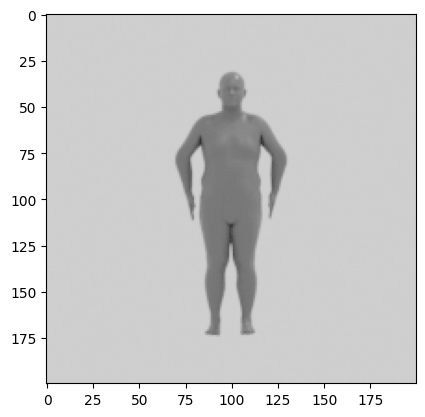

In [20]:
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
# Plot the subject image with the subject string
img_t = sample["image"]
# For plotting
toPILImage = transforms.ToPILImage()
img = toPILImage(img_t[0])
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)

In [23]:
model = na.NeuralAnthropometer(debug=False)
model.load_state_dict(torch.load(model_file_path))
model.eval()
predicted_hbds = model(img_t)

print(sample["annotations"]["human_dimensions"])
print(predicted_hbds)

tensor([[1.1859, 1.7814, 0.6826, 0.5568, 1.2155, 0.5651, 0.4450, 1.1610]])
tensor([[1.2052, 1.7840, 0.6865, 0.5425, 1.2263, 0.5785, 0.4331, 1.1519]],
       grad_fn=<AddmmBackward0>)
